<a href="https://colab.research.google.com/github/insight2action/Foundations2/blob/main/Runtime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import datetime
print("This code was last run on: ", datetime.datetime.now())

This code was last run on:  2022-09-27 17:22:40.603065


In [45]:
import numpy as np
import matplotlib.pyplot as plt

Analyzing the asymmptotic runtime of algorithms is an important area of study. This notebook provides a demonstration showing the runtime of algorithms and the asymptotically tights bounds. 

## Asymptotic Growth Comparison Benchmark

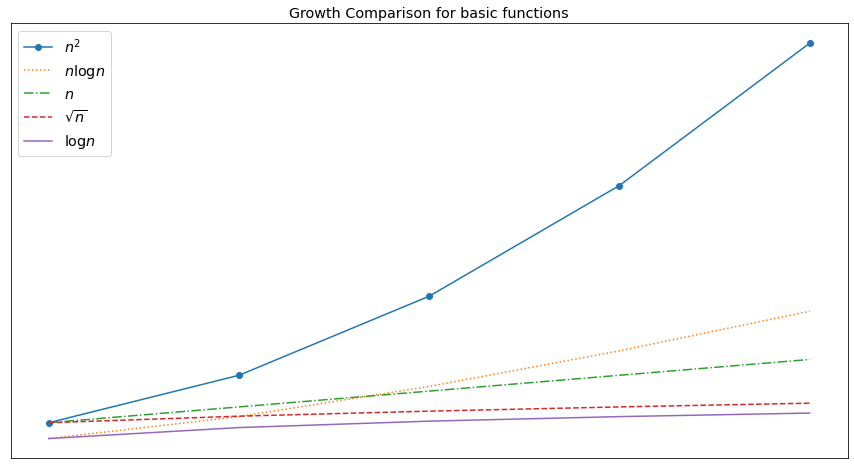

In [46]:
figure, axes = plt.subplots(figsize=(15, 8))


plt.plot(np.power(np.ones(5).cumsum(), 2), label ="$n^{2}$", marker = 'o')
plt.plot(np.ones(5).cumsum() * (np.log(np.ones(5).cumsum())), label = "$n \log n$", linestyle = ':')
plt.plot(np.power(np.ones(5).cumsum(), 1 ), label = "$n$", linestyle = '-.')
plt.plot(np.sqrt(np.ones(5).cumsum()), label ="$\sqrt{n}$", linestyle = '--')
plt.plot(np.log(np.ones(5).cumsum()), label = "$\log n$")


axes.set_yticks([])
axes.set_xticks([])

plt.title("Growth Comparison for basic functions", fontsize = 'x-large')
plt.legend(fontsize = 'x-large')
plt.show()


## For Loops


$\mbox{Algorithm } f(n): $

$x \leftarrow 0 $

$\mbox{for } i \leftarrow 1 \mbox{ to } n $  

$\mbox{..... for } j \leftarrow 1 \mbox{ to } n $  

$ \mbox{.......... } x \leftarrow x+(i - j)$

$\mbox{..... end for}$

$\mbox{end for} $

$--------------------------------------$

Runtime analysis for $f(n)$:

$$
r(t) = \sum_1^n \sum_1^n c = \sum_1^n nc = n^2c
$$

Therefore, letting $c_1 = 0.5$ and $c_2 = 1.5$, we have $0.5 n^2 \le r(t) \le 1.5 n^2$, and hence $r(t) \in \Theta({n^2})$. 

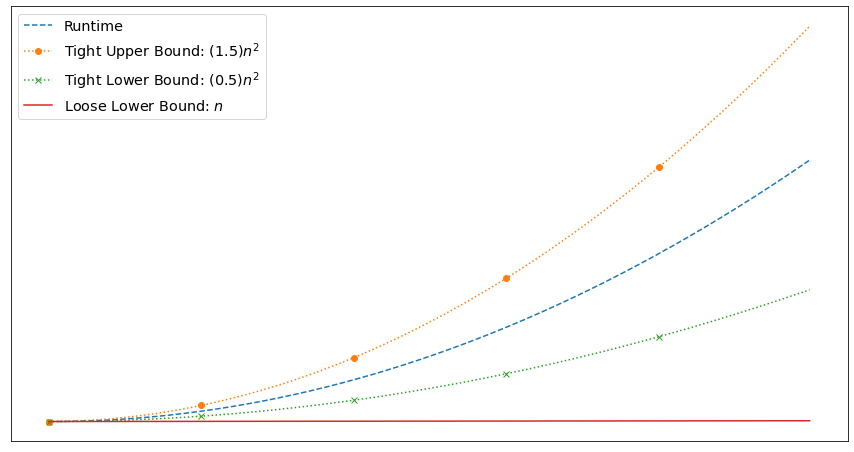

In [47]:
num_iterations = 500

rt = np.zeros(num_iterations)

for n in  range(1, num_iterations): 

  c = 1

  for i in range(1, n):
      for i in range(1, n):
        c= c+1
  
  rt[n] = c

figure, axes = plt.subplots(figsize=(15, 8))

plt.plot(rt, label = "Runtime", linestyle = '--')
plt.plot(1.5 * np.power(np.ones(num_iterations).cumsum(), 2), label = "Tight Upper Bound: $(1.5) n^2$", linestyle = ':', marker = 'o', markevery=100)
plt.plot(0.5 * np.power(np.ones(num_iterations).cumsum(), 2 ), label = "Tight Lower Bound: $(0.5) n^2$", linestyle = ':', marker = 'x', markevery=100)
plt.plot(1.5 * np.power(np.ones(num_iterations).cumsum(), 1), label = "Loose Lower Bound: $n$")
plt.legend(fontsize = 'x-large')
axes.set_yticks([])
axes.set_xticks([])

plt.show()

$\mbox{Algorithm } f(n): $

$x \leftarrow 0 $

$\mbox{for } i \leftarrow 1 \mbox{ to } 2n $  

$\mbox{..... for } j \leftarrow 1 \mbox{ to } \lfloor \sqrt{n} \rfloor  $  

$ \mbox{.......... } x \leftarrow x+(i - j)$

$\mbox{..... end for}$

$\mbox{end for} $


$--------------------------------------$

Runtime analysis for $f(n)$:

$$
r(t) = \sum_1^{2n} \sum_1^{\lfloor \sqrt{n} \rfloor} c \le \sum_1^{2n} c \sqrt{n} = c 2n \sqrt{n} = 2cn^{\frac{3}{2}}
$$

$$
r(t) = \sum_1^{2n} \sum_1^{\lfloor \sqrt{n} \rfloor} c \ge \sum_1^{2n} \sum_{\lfloor \frac{\sqrt{n}}{2} \rfloor}^{\lfloor \sqrt{n} \rfloor}  \ge \sum_1^{2n} c \frac{\sqrt{n}}{2} = c 2n \frac{\sqrt{n}}{2}= cn^{\frac{3}{2}}
$$


Therefore, letting $c_1 = 1$ and $c_2 = 2$, we have $1 n^2 \le r(t) \le 2 n^2$, and hence $r(t) \in \Theta({n^{3/2}})$. 


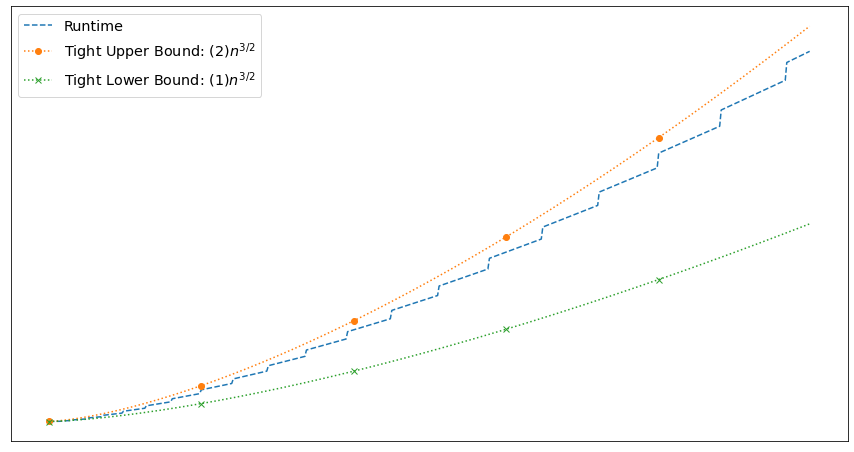

In [48]:
num_iterations = 500

rt = np.zeros(num_iterations)

for n in range(1, num_iterations): 

  c = 1

  for i in range(1, 2* n):
      for i in range(1, int(np.floor(np.sqrt(n)))):
        c= c+1
  
  rt[n] = c


figure, axes = plt.subplots(figsize=(15, 8))

plt.plot(rt, label = "Runtime", linestyle = '--')
plt.plot(2 * np.power(np.ones(num_iterations).cumsum(), 3/2), label = "Tight Upper Bound: $(2)  n^{3/2}$", linestyle = ':', marker = 'o', markevery=100)
plt.plot(1 * np.power(np.ones(num_iterations).cumsum(), 3/2 ), label = "Tight Lower Bound: $(1) n^{3/2}$", linestyle = ':', marker = 'x', markevery=100)
plt.legend(fontsize = 'x-large')
axes.set_yticks([])
axes.set_xticks([])

plt.show()


## While Loops

$\mbox{Algorithm } f(n): $

$x \leftarrow 0 $

$i \leftarrow 0 $

$\mbox{while } i < n \mbox{do}$  

$ \mbox{..... } x \leftarrow x+(i - j)$

$ \mbox{..... } i \leftarrow 3i$

$\mbox{end while}$



$--------------------------------------$

Runtime analysis for $f(n)$:

Iterations in the while loop stop when $3^k > n$, or $k  > \log_3 n$. 

$$
r(t) = \underbrace{c + c + \cdots + c}_{\log_3 n} = c \log_3 n
$$

Therefore, letting $c_1 = 1$ and $c_2 = 2$, we have $1 \log_3 n \le r(t) \le 2 \log_3 n$, and hence $r(t) \in \Theta(\log n)$. 


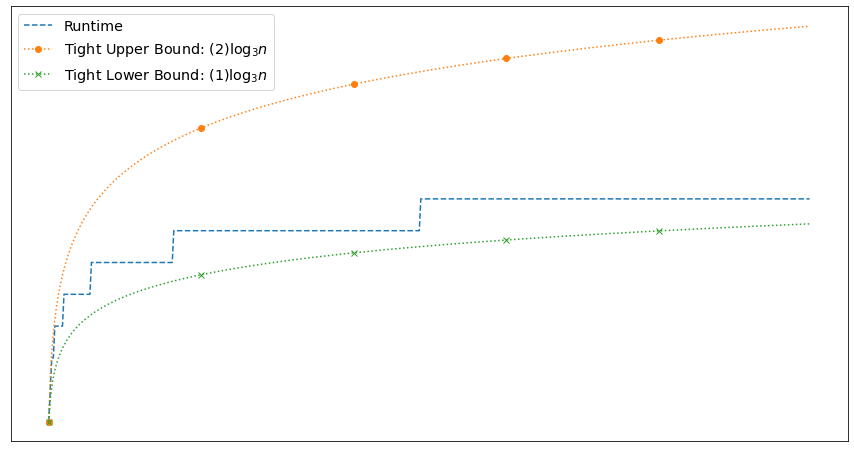

In [49]:
num_iterations = 500

rt = np.zeros(num_iterations)

for n in range(1, num_iterations): 

  c = 1
  i = 1

  while i < n:
     i = 3*i
     c= c+1
  
  rt[n] = c


figure, axes = plt.subplots(figsize=(15, 8))

plt.plot(rt, label = "Runtime", linestyle = '--')
plt.plot(2 * np.log(np.ones(num_iterations).cumsum()), label = "Tight Upper Bound: $(2)  \log_3 n}$", linestyle = ':', marker = 'o', markevery=100)
plt.plot(1 * np.log(np.ones(num_iterations).cumsum()), label = "Tight Lower Bound: $(1) \log_3 n$", linestyle = ':', marker = 'x', markevery=100)
plt.legend(fontsize = 'x-large')
axes.set_yticks([])
axes.set_xticks([])

plt.show()


## For While Loop

$\mbox{Algorithm } f(n): $

$x \leftarrow 0 $


$\mbox{for } i \leftarrow 1 \mbox{ to } 2n $

$\mbox{..... }j \leftarrow 0 $

$\mbox{..... while } j < n \mbox{ do}$  

$ \mbox{.......... } x \leftarrow x+(i - j)$

$ \mbox{.......... } j \leftarrow 2j$

$\mbox{..... end while}$

$\mbox{end for}$



$--------------------------------------$

Runtime analysis for $f(n)$:

Iterations in the while loop stop when $3^k > n$, or $k  > \log_3 n$. 

$$
r(t) = \sum_{1}^{2n} \underbrace{c + c + \cdots + c}_{\log_2 n} = c \log_3 n
= 2nc \log_3 n$$

Therefore, letting $c_1 = 1$ and $c_2 = 2$, we have $1 n \log_2 n \le r(t) \le 2 n \log_2 n$, and hence $r(t) \in \Theta(n \log n)$. 


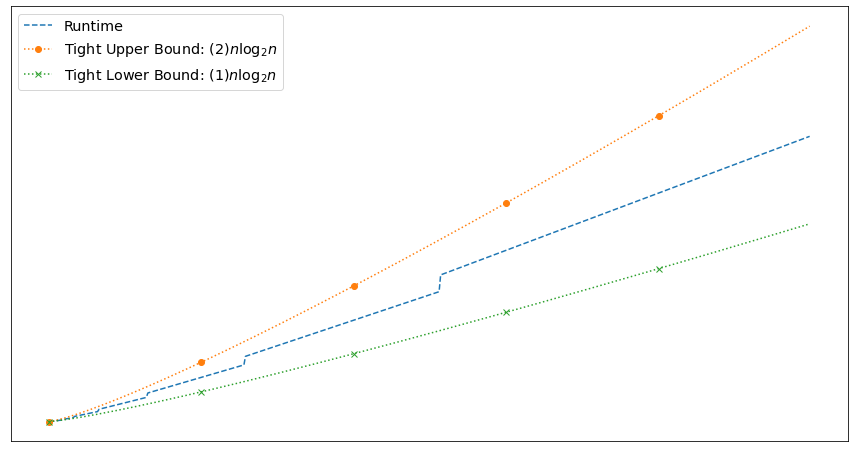

In [50]:
num_iterations = 500

rt = np.zeros(num_iterations)

for n in range(1, num_iterations): 

  c = 1
  i = 1

  for i in range(1, n):
    j = 1
    while j < n:
     j = 2*j
     c= c+1
  
  rt[n] = c


figure, axes = plt.subplots(figsize=(15, 8))

plt.plot(rt, label = "Runtime", linestyle = '--')
plt.plot(2 * np.ones(num_iterations).cumsum() * np.log(np.ones(num_iterations).cumsum()), label = "Tight Upper Bound: $(2)  n \log_2 n}$", linestyle = ':', marker = 'o', markevery=100)
plt.plot(1 * np.ones(num_iterations).cumsum() * np.log(np.ones(num_iterations).cumsum()), label = "Tight Lower Bound: $(1) n \log_2 n$", linestyle = ':', marker = 'x', markevery=100)
plt.legend(fontsize = 'x-large')
axes.set_yticks([])
axes.set_xticks([])

plt.show()
